# Gene essentiality

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pandas import DataFrame
from cobra.io import read_sbml_model
%matplotlib inline
model = read_sbml_model('e_coli_core.xml')

### Knocking out a single gene
#### In the model, exactly one gene is associated with reaction with phosphoglycerate kinase (PGK).

In [14]:
model.reactions.PGK.name

'Phosphoglycerate kinase'

In [15]:
model.reactions.PGK.genes

frozenset({<Gene b2926 at 0x7f2bf8647990>})

In [16]:
model.reactions.PGK.gene_reaction_rule

'b2926'

In [17]:
model.genes.b2926.name

'pgk'

### Is pgk essential? Let's find out.



In [6]:
model.genes.b2926.knock_out()
print(model.slim_optimize())

0.0


## Yes, it is.

### But using this method we modiffied the model that we are working with?

## what can we do to avoid this?

In [18]:
model = read_sbml_model('e_coli_core.xml')
model2=model.copy()

### This may work for one mutant but what happends when we want to do a model-wide exploration?

### Perform all possible single gene deletions
#### Using a for loop allows to iterate over all genes in the model and knock out each one of them individually. We're using the model as a context to undo every gene deletion before proceeding to the next knockout.

In [19]:
essentiality = {}
for gene in model.genes:
    with model:
        gene.knock_out()
        essentiality[gene] = model.slim_optimize(error_value=0.)

In [9]:
essentiality

{<Gene b4014 at 0x7f2bfab39050>: 0.8739215069684286,
 <Gene b3236 at 0x7f2bfab39090>: 0.8258192905969877,
 <Gene b1479 at 0x7f2bfab390d0>: 0.8739215069684299,
 <Gene b2463 at 0x7f2bfab39110>: 0.8739215069684299,
 <Gene b2276 at 0x7f2bfab39150>: 0.2116629497353147,
 <Gene b2279 at 0x7f2bfab39190>: 0.2116629497353147,
 <Gene b2288 at 0x7f2bfab391d0>: 0.2116629497353147,
 <Gene b2278 at 0x7f2bfab39210>: 0.2116629497353147,
 <Gene b2286 at 0x7f2bfab39250>: 0.2116629497353147,
 <Gene b2285 at 0x7f2bfab39290>: 0.2116629497353147,
 <Gene b2283 at 0x7f2bfab392d0>: 0.2116629497353147,
 <Gene b2287 at 0x7f2bfab39310>: 0.2116629497353147,
 <Gene b2284 at 0x7f2bfab39350>: 0.2116629497353147,
 <Gene b2281 at 0x7f2bfab39390>: 0.2116629497353147,
 <Gene b2277 at 0x7f2bfab393d0>: 0.2116629497353147,
 <Gene b2282 at 0x7f2bfab39410>: 0.2116629497353147,
 <Gene b2280 at 0x7f2bfab39450>: 0.2116629497353147,
 <Gene b1603 at 0x7f2bfab39490>: 0.87392150696843,
 <Gene b1602 at 0x7f2bfab394d0>: 0.8739215069684

In [22]:
from pandas import Series
ess=Series(essentiality)

In [24]:
ess

b1854    8.739215e-01
b4301    8.739215e-01
b3386    8.739215e-01
b2914    8.739215e-01
b4090    8.739215e-01
b0723    8.142975e-01
b0724    8.142975e-01
b0722    8.142975e-01
b0721    8.142975e-01
b0729    8.583074e-01
b0728    8.583074e-01
b0008    8.739215e-01
b2464    8.739215e-01
b2935    8.739215e-01
b2465    8.739215e-01
b3919    7.040369e-01
b0451    8.739215e-01
b2285    2.116629e-01
b2283    2.116629e-01
b2287    2.116629e-01
b2284    2.116629e-01
b3962    8.739215e-01
b1602    8.739215e-01
b2277    2.116629e-01
b2282    2.116629e-01
b1603    8.739215e-01
b2280    2.116629e-01
b3916    8.739215e-01
b3114    8.739215e-01
b0115    7.966959e-01
             ...     
b3735    8.739215e-01
b3732    8.739215e-01
b3738    8.739215e-01
b3733    8.739215e-01
b1478    8.739215e-01
b3739    8.739215e-01
b0733    8.739215e-01
b3736    8.739215e-01
b0720   -1.892708e-15
b0978    8.739215e-01
b0979    8.739215e-01
b0903    8.739215e-01
b2579    8.739215e-01
b2926    3.327894e-16
b4025    8

In [10]:
df = DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')

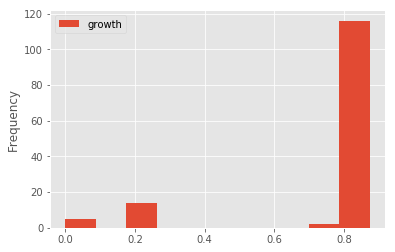

In [11]:
df.plot.hist()

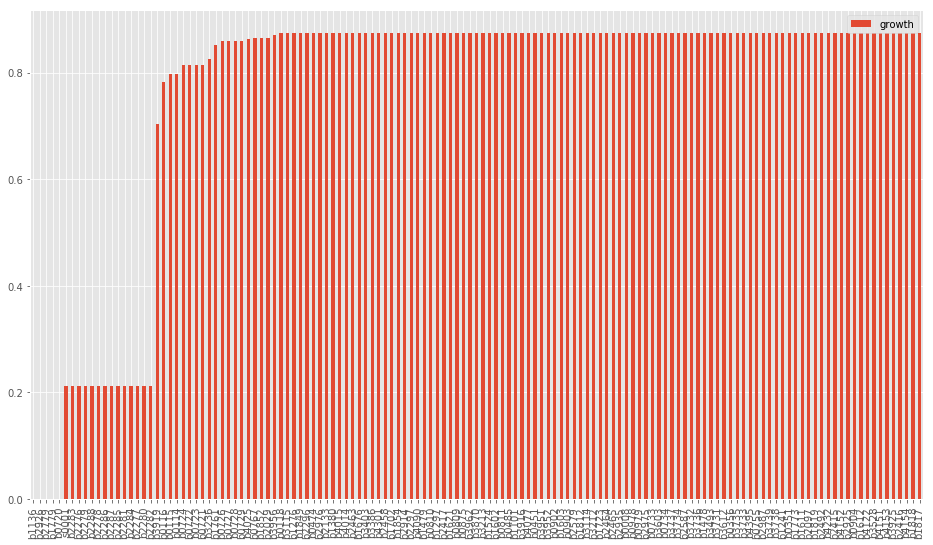

In [12]:
ax = df.plot.bar().axes
ax.figure.set_size_inches(16, 9)